In [1]:
import regimes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from commonyearsdataplot import commonyearsplot
from clustereddf_subsets import clustereddf
import glob
from regimesgroupplot import groupregimesplot
from regimesgroupplot import yearlygroupregimeplot
from datetime import datetime
np.random.seed(1)

In [2]:
#reading of the data for each site
Forest_list=[]
for file_name in glob.glob(r'./datasets/Subsets_Forest/'+'*.csv'):
    Forest_list.append(  pd.read_csv(file_name))

#DE_Hai=pd.read_csv(r'./datasets/Subsets/FLX_DE-Hai_FLUXNET2015_SUBSET_DD_2000-2012_1-4.csv')
#AU_Cpr=pd.read_csv(r'../datasets/Subsets/FLX_AU-Cpr_FLUXNET2015_SUBSET_DD_2010-2014_2-4.csv')
#DE_Spw=pd.read_csv(r'../datasets/Subsets/FLX_DE-Spw_FLUXNET2015_SUBSET_DD_2010-2014_1-4.csv')
#IT_Col=pd.read_csv(r'../datasets/Subsets/FLX_IT-Col_FLUXNET2015_SUBSET_DD_1996-2014_1-4.csv')
#ab=pd.read_csv(r'../datasets/Subsets/FLX_AU-Cpr_FLUXNET2015_SUBSET_DD_2010-2014_2-4.csv')
#setting the parameters required
climate=["TA_F","SW_IN_F","LW_IN_F","VPD_F"]#"NETRAD"]
eco=["LE_F_MDS","NEE_VUT_REF","RECO_NT_VUT_REF","GPP_NT_VUT_REF"]
DE_Hai=Forest_list[1]

/home/gull/anaconda3/envs/regimesident/lib/python3.11/site-packages/pyriemann/utils/mean.py:522: UserWarning: Convergence not reached
  warnings.warn("Convergence not reached")


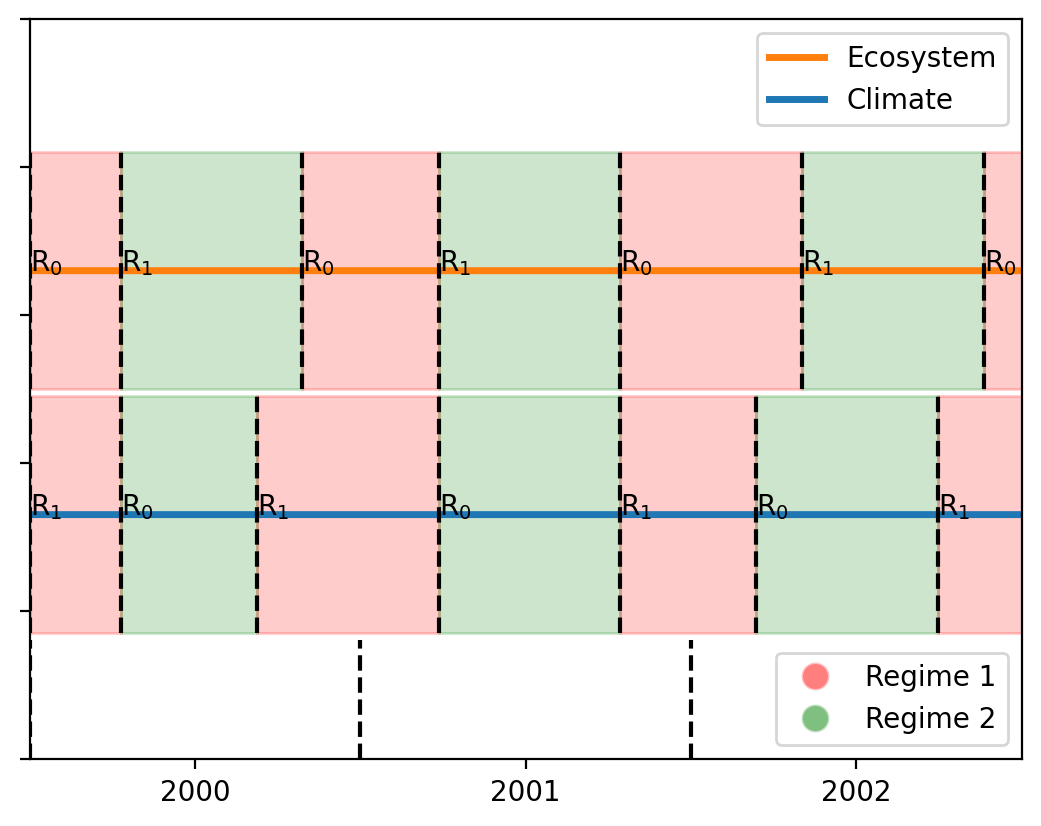

In [3]:
groupregimesplot(DE_Hai,climate,eco,2,50,3)

/home/gull/anaconda3/envs/regimesident/lib/python3.11/site-packages/pyriemann/utils/mean.py:522: UserWarning: Convergence not reached
  warnings.warn("Convergence not reached")


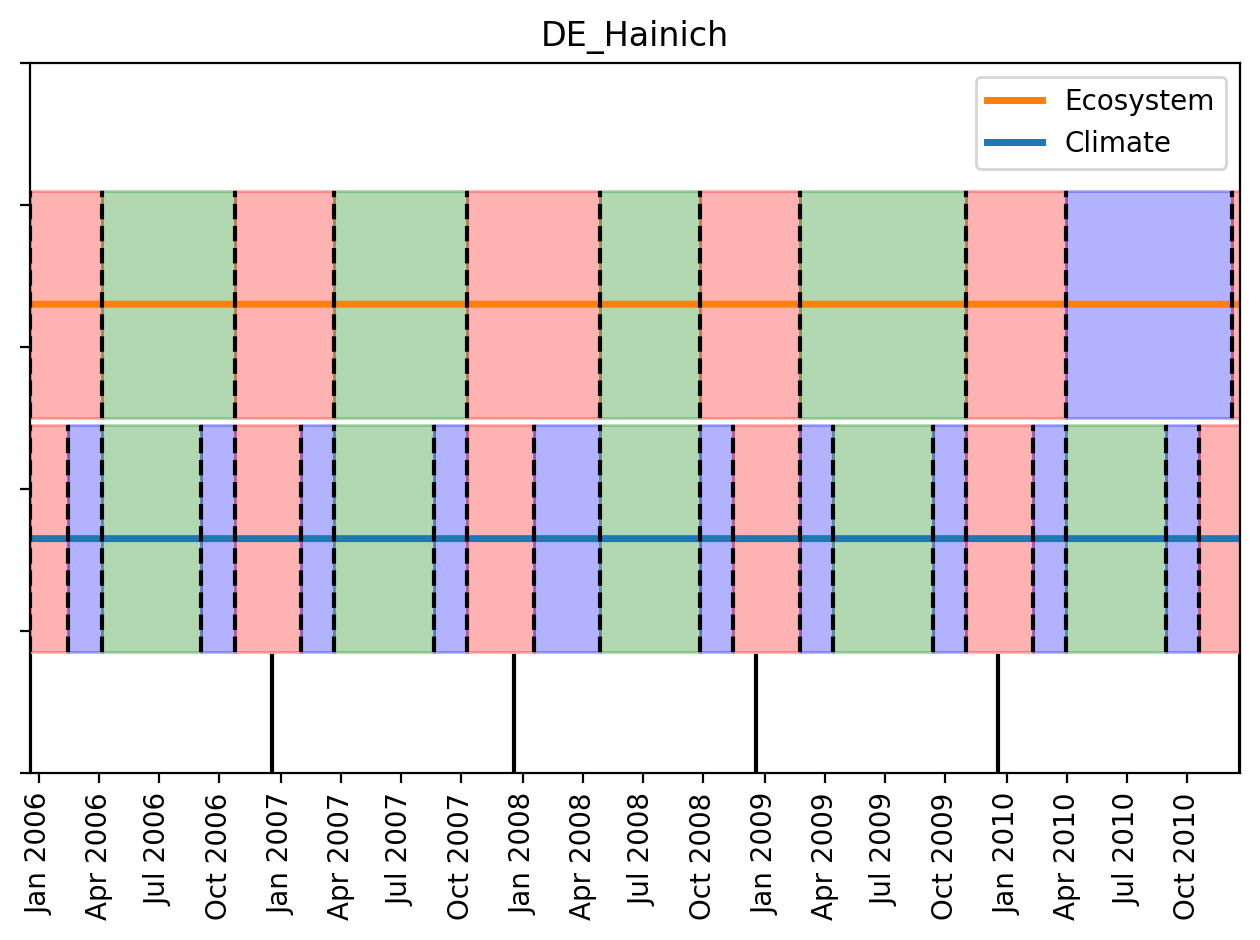

In [4]:
yearlygroupregimeplot(DE_Hai,climate,eco,3,50,2006,2010,title='DE_Hainich')

/home/gull/anaconda3/envs/regimesident/lib/python3.11/site-packages/pyriemann/utils/mean.py:522: UserWarning: Convergence not reached
  warnings.warn("Convergence not reached")


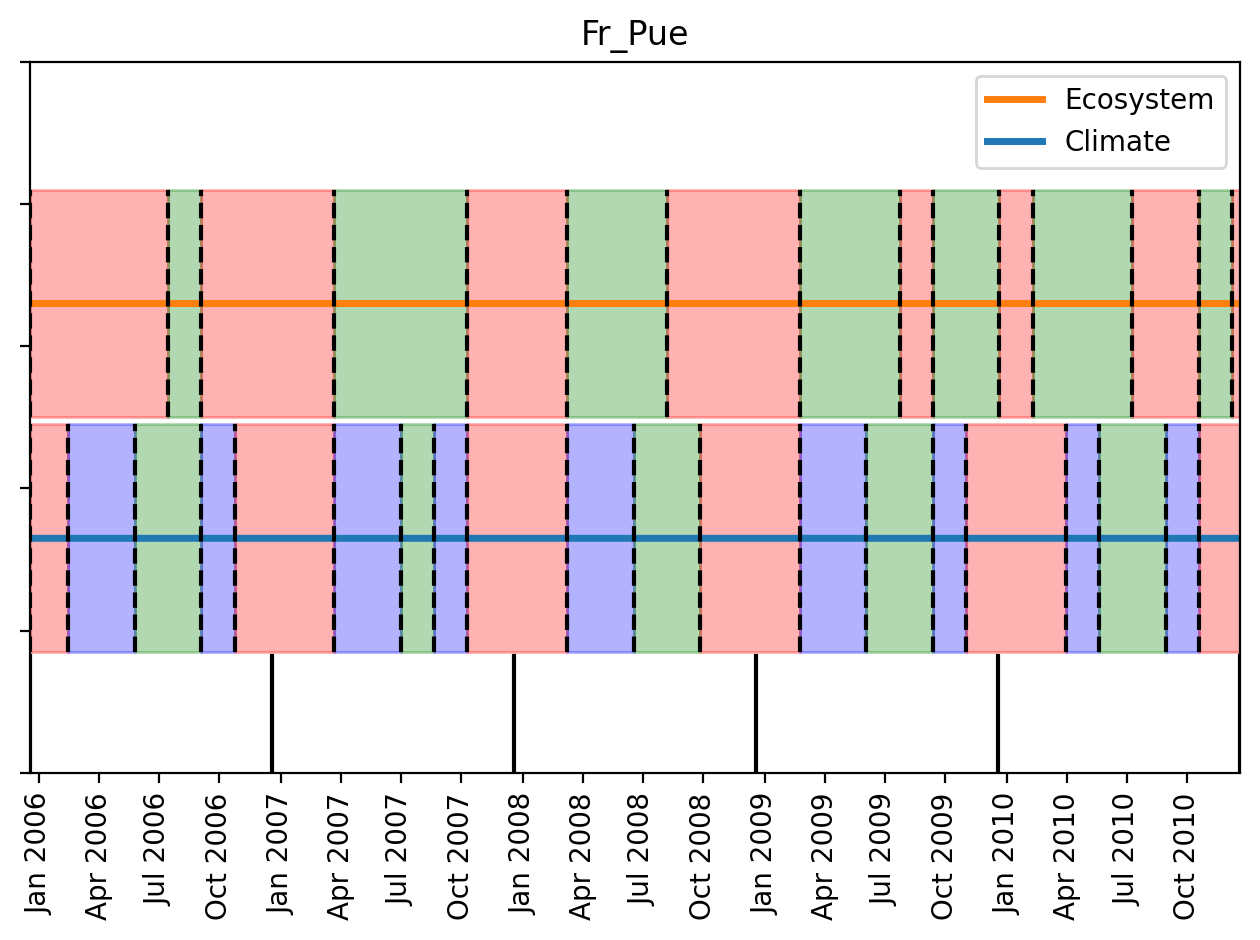

In [5]:
FR_Pue=pd.read_csv(r'../datasets/comparisonsites/FLX_FR-Pue_FLUXNET2015_SUBSET_DD_2000-2014_2-4.csv')
yearlygroupregimeplot(FR_Pue,climate,eco,3,50,2006,2010,title='Fr_Pue')

In [6]:
#df_list={}
#for j,df in enumerate(Forest_list):
    #df_cli=clustereddf(df,climate,3,100)#['Clusters']
    #df_eco=clustereddf(df,eco,3,100)
#    df_list[j]=df_cli,df_eco


#df_cli=clustereddf(DE_Hai,climate,2,40)#['Clusters']
#df_eco=clustereddf(DE_Hai,eco,2,80)
#df_list=[df_cli,df_eco]

In [7]:
#groupregimesplot(Forest_list[0],climate,eco,3,40,5)

In [8]:
#groupregimesplot(Forest_list[1],climate,eco,3,50,3)

In [9]:
#groupregimesplot(Forest_list[2],climate,eco,3,40,5)

In [10]:
#groupregimesplot(Forest_list[3],climate,eco,3,40,5)

In [11]:
#groupregimesplot(Forest_list[4],climate,eco,3,40,5)

In [12]:
#reading of the data for each site
Crop_list=[]
for file_name in glob.glob(r'./datasets/Subsets_Crop/'+'*.csv'):
    Crop_list.append(  pd.read_csv(file_name))

/home/gull/anaconda3/envs/regimesident/lib/python3.11/site-packages/pyriemann/utils/mean.py:522: UserWarning: Convergence not reached
  warnings.warn("Convergence not reached")


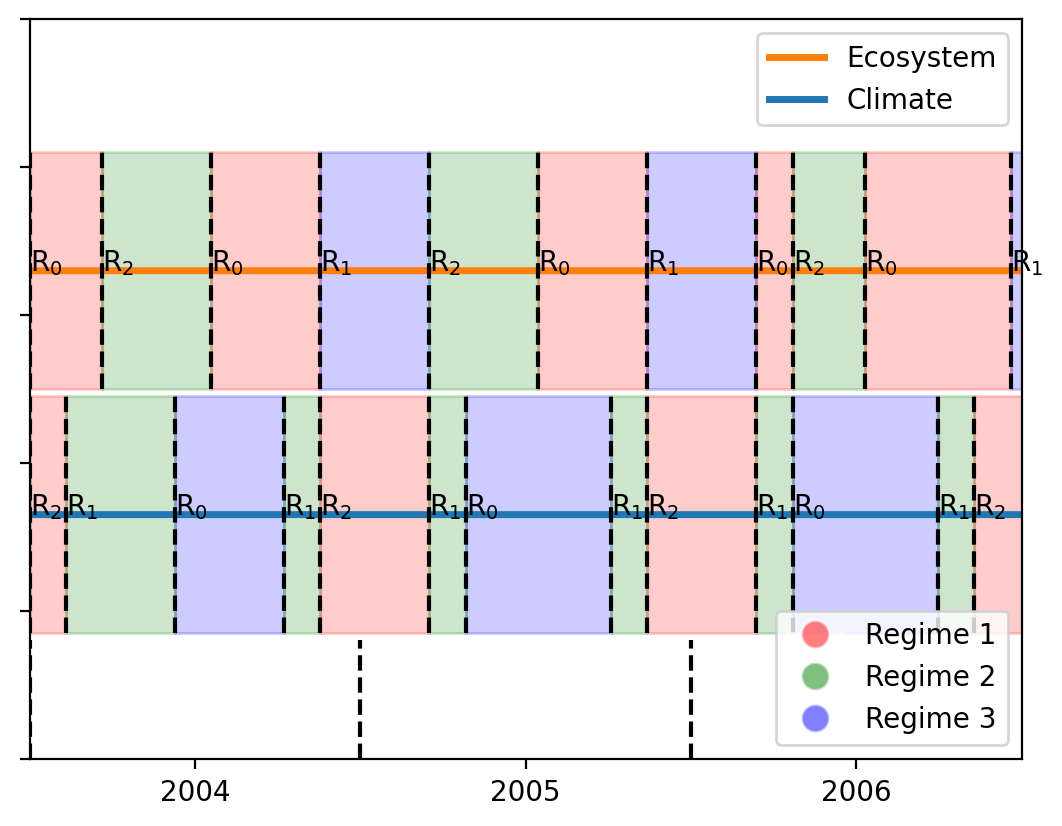

In [19]:
groupregimesplot(Crop_list[0],climate,eco,3,40,3)

In [14]:
#groupregimesplot(Crop_list[1],climate,eco,3,40,5)

In [15]:
#groupregimesplot(Crop_list[2],climate,eco,3,60,5)

In [16]:
#groupregimesplot(Crop_list[3],climate,eco,3,40,5)

In [17]:
#groupregimesplot(Crop_list[4],climate,eco,3,40,5)

In [18]:
#groupregimesplot(Forest_list[0],climate,eco,2,40,5)